Assignment-Week 5
BITS F464    
Shivam Chadha  
2019B4AA0704G  
Honour Code: I shall be honest in my efforts and will make my parents proud

## 1

### MLE
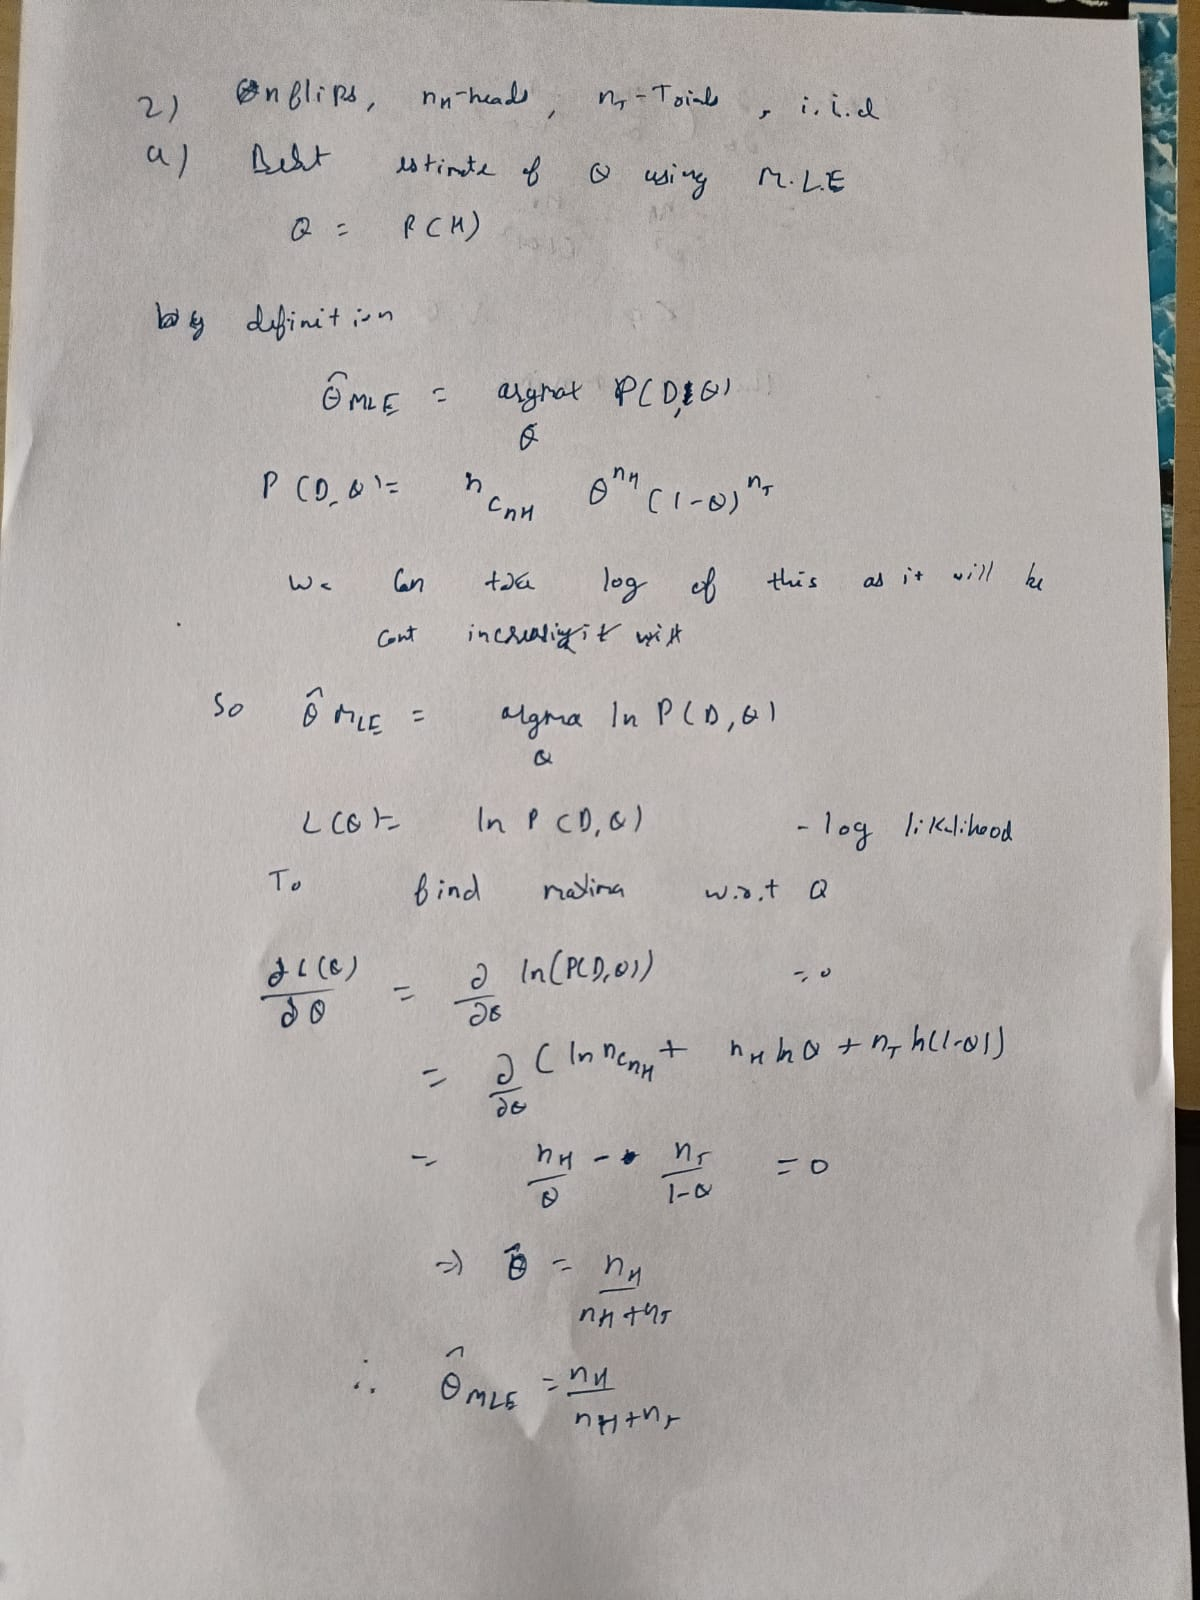
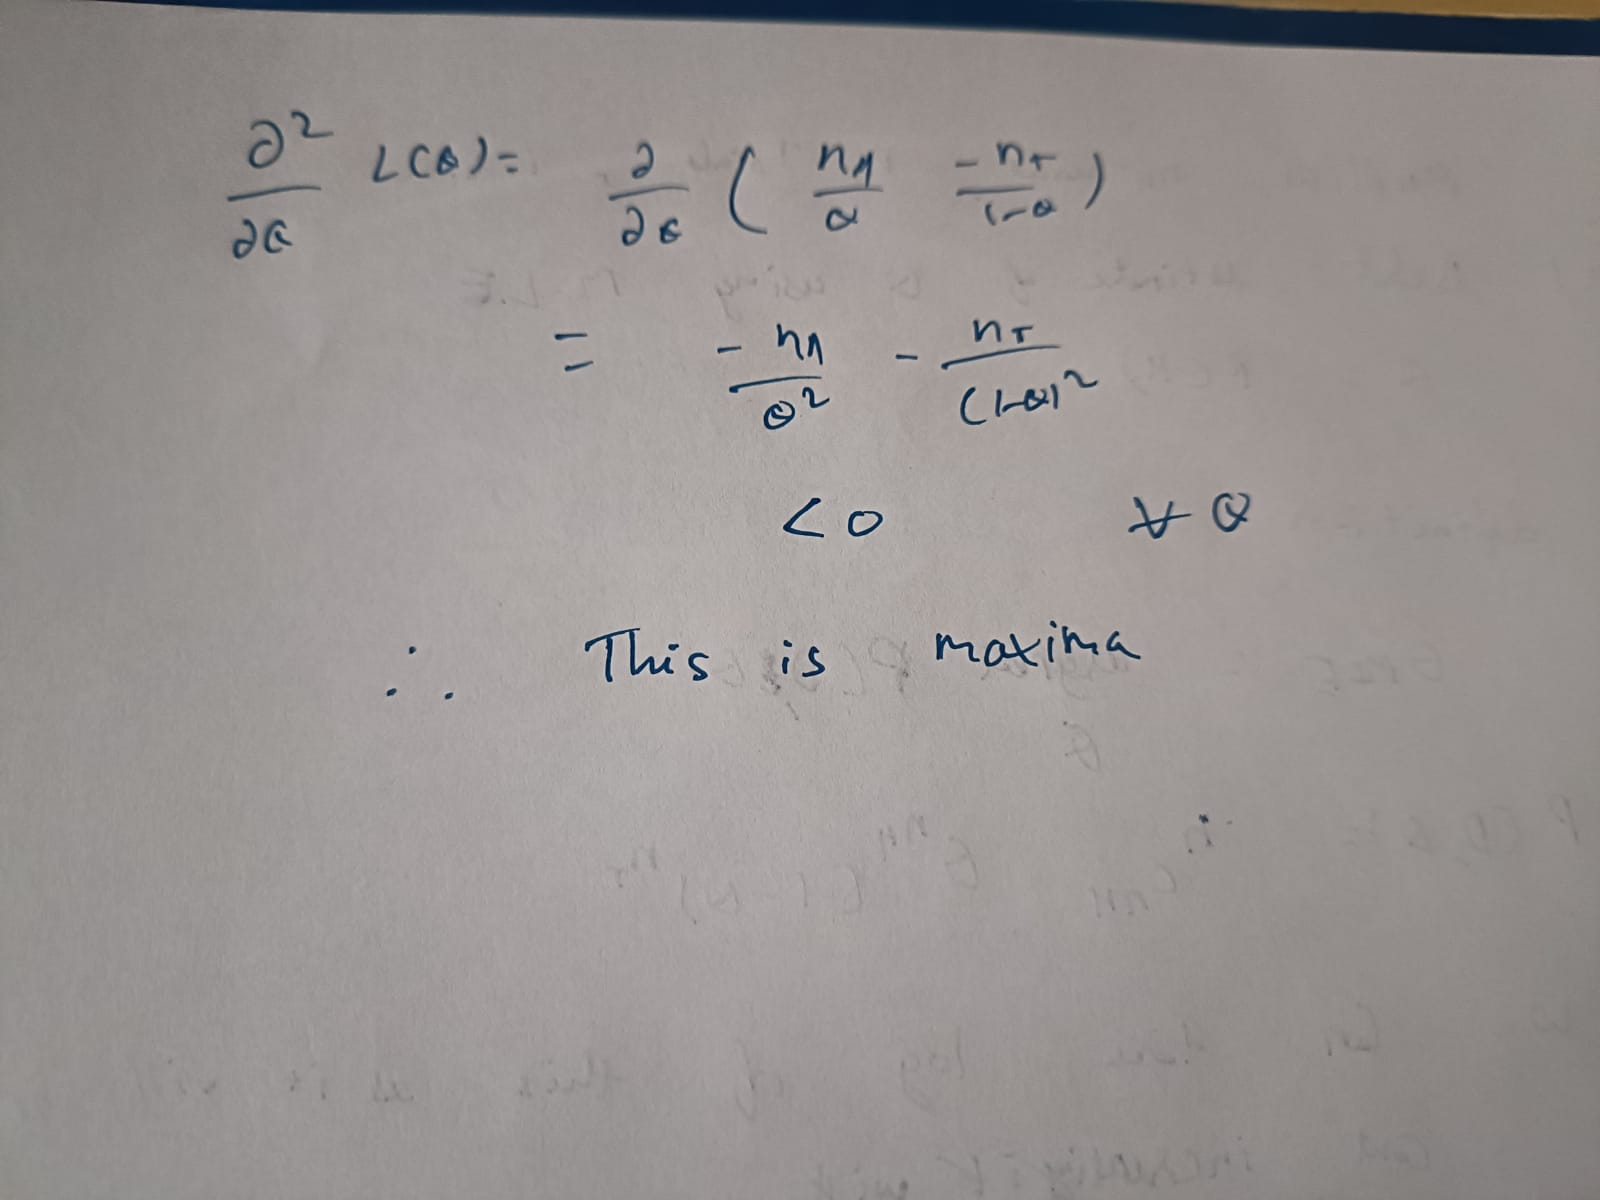
### MAP
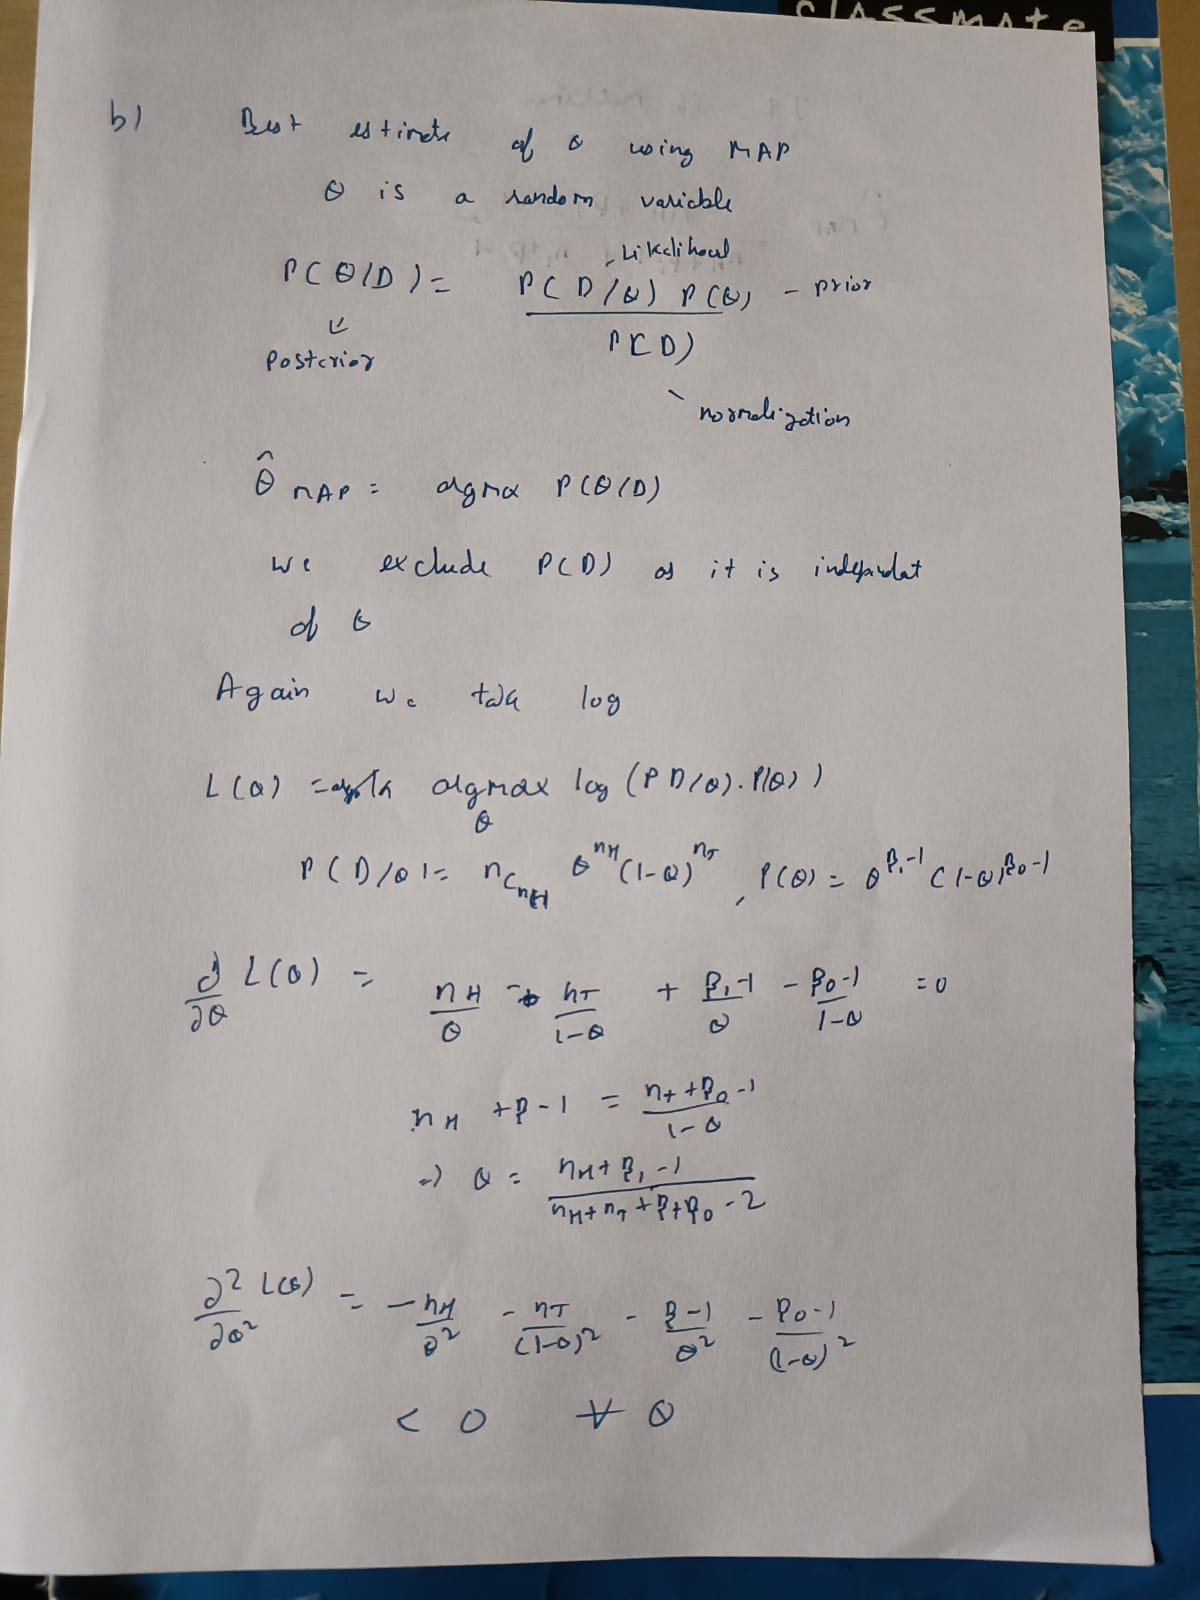
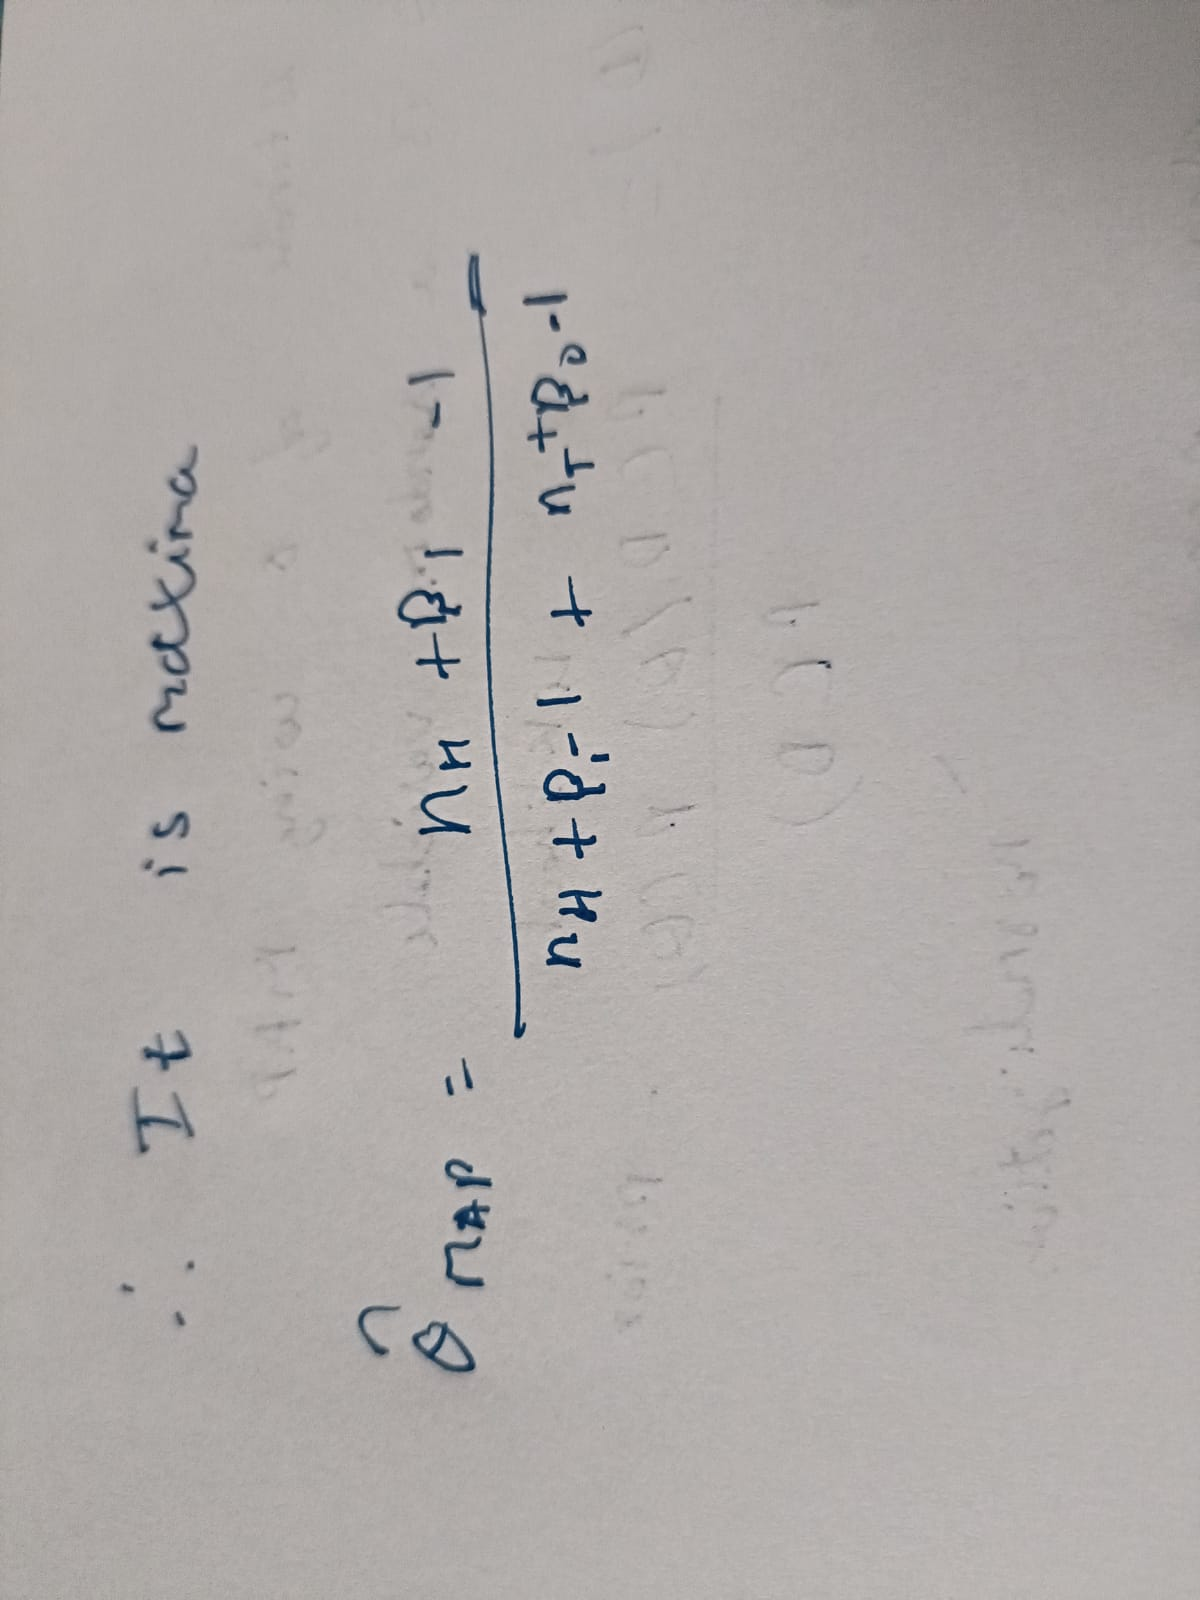

## 2

Prior
$$ 
\frac{P(θ) = θ^{β_1-1}(1-θ)^{β_0-1}}{B(β_0,β_1)}\\
$$
Likelihood
$$
P(D|θ) =  {n \choose n_h} θ^{n_h}(1-θ)^{n_t}
$$
Posterior
$$
P(θ|D) = P(D|θ)P(θ)
$$

In [ ]:
import numpy as np
from math import factorial as f
from math import gamma 
import matplotlib.pyplot as plt


In [ ]:

def B(b0,b1):
    return gamma(b0)*gamma(b1)/gamma(b0+b1)
def pdt(theta,nh,nt):
    return f(nh+nt)/(f(nh)*f(nt))*(theta**nh)*((1-theta)**nt)

def pt(theta,b0,b1):
    return (theta**(b1-1))*((1-theta)**(b0-1))/B(b0,b1)

### 2c-1

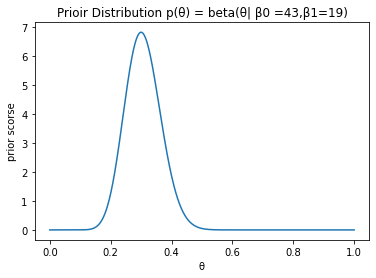

In [ ]:
n = 1000
nh = 6
nt = 9
theta = np.linspace(0,1,n)

ptheta = pt(theta,43,19)
pscore = pdt(theta,nh,nt)*ptheta
    

plt.plot(theta,ptheta)
plt.title('Prioir Distribution p(θ) = beta(θ| β0 =43,β1=19)')
plt.ylabel('prior scorse')
plt.xlabel('θ');

Hallucinations are 42 and 18.  
P(heads) = 18/60 = 0.3.  
So, the above plot is centered at 0.3.

### 2c-2

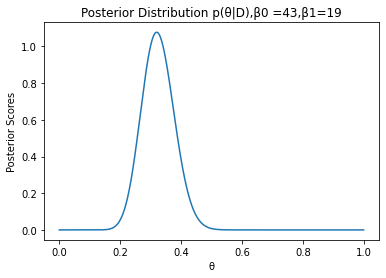

In [ ]:
plt.plot(theta,pscore)
plt.title('Posterior Distribution p(θ|D),β0 =43,β1=19')
plt.ylabel('Posterior Scores')
plt.xlabel('θ');

Observed - 6H 9T.  
P(H) = 0.4.  
The hallucinations will push $θ_{max}$ towards 0.3.  
So the distribution is centered around 0.32 and as we increase the confidence of prior data $θ_{max}$ will go towards 0.4.  

2c-3

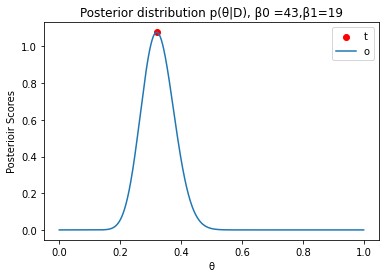

In [ ]:
ind = np.argmax(pscore)
tmap_approx = theta[ind]
tmap = (nh+19-1)/(nh+19+nt+43-2)

plt.scatter(tmap,pscore[ind],color ='r',label ='approx θmap value')
plt.plot(theta,pscore,label='P(D|θ)')
plt.title('Posterior distribution p(θ|D), β0 =43,β1=19')
plt.ylabel('Posterioir Scores')
plt.xlabel('θ')
plt.legend('top right');


In [ ]:
print(tmap_approx)
print(tmap)

0.3203203203203203
0.32


Looking at the graph, we can estimate θMap to be just above 0.3.  
Taking the max value we get $θ_{map} = 0.32032$.  
While The True value is $θ_{map} = 0.32$

In [ ]:
tmle = nh/(nh+nt)
print("exact value of MLE estimate \n θ_mle = ",tmle)

exact value of MLE estimate 
 θ_mle =  0.4


$θ_{MLE} = 0.4$

### 2c-4

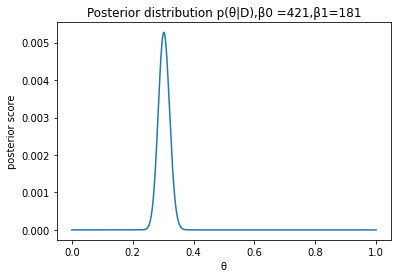

In [ ]:
b0 = 421
b1 = 181
pscore1 = pdt(theta,nh,nt) *(theta**(b1-1))*((1-theta)**(b0-1)) /  ( f(b0-1)*f(b1-1)/f(b0+b1-2) )
#gamma funtion gave math range error - using (n-1)!
plt.plot(theta,pscore1)
plt.title('Posterior distribution p(θ|D),β0 =421,β1=181')
plt.ylabel('posterior score')
plt.xlabel('θ');

In [ ]:
theta[np.argmax(pscore1)]

0.3023023023023023

Here we increased our confidence in the prior data.
Estimated θ will be closer to 0.3.  
From 0.32 it changed to 0.302.

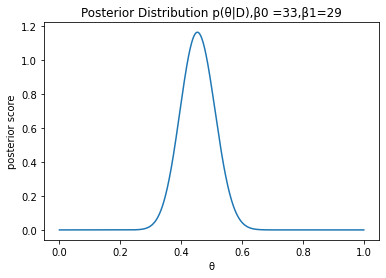

In [ ]:
ptheta2 = pt(theta,33,29)
pscore2 = pdt(theta,nh,nt)*ptheta2
plt.plot(theta,pscore2)
plt.title('Posterior Distribution p(θ|D),β0 =33,β1=29')
plt.ylabel('posterior score')
plt.xlabel('θ');

In [ ]:
theta[np.argmax(pscore2)]

0.45345345345345345

Here hallucinations are 28 heads and 32 tails, this give $P(heads) = 0.467$.    
In the original case the P was 0.3.    
Thus our estimate will be pushed towards 0.467.  
As shown above, it is centered towards 0.45 for these parameters.